# Esther McCabe
### GENBA 894

## Factors that influence the sale price of lots of beef calves and feeder cattle sold via summer video auction from 1995 through 2018

In [977]:
# import python packages
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from pandas.tools import plotting
import matplotlib.pyplot as plt
%matplotlib inline

#regression packages
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

import statsmodels.api as sm
from statsmodels.formula.api import ols

#lasso regression
from sklearn import linear_model

#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import chi2

## Lots of Beef Calves

In [844]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.beefmagazine.com/sites/beefmagazine.com/files/styles/article_featured_standard/public/baby-beef-calves-weaned20070718dab48.jpg?itok=-978nEuZ")

## Data Description

#### This observational dataset has been collected since 1995 through 2018 from one video auction company. Over the last 24 years, the same person has input all data into the database. The database is currently maintained in Access and updated throughout the year. There are 241,278 lots of cattle in the database, each with numerous variables collected such as sale date, weight, breed, etc. All the lot information is provided electronically by the video auction company. These 241,278 lots represent 26,435,097 head of cattle. 

#### For this project, only sold lots of beef calves and feeder cattle lots from the summer sales are included.

### We will start with lots of beef calves. 

#### Variables:
- SYEAR: Sale Year 1995 - 2018
- LOTID: Count of number of lots of beef calves
- SMONTH: Sale Month 1=January, 12=December
- SUMMER: Sold in a summer sale, all 1=Yes
- HEAD: Number of calves in a lot
- SEX: Gender of lot, 1=Steer, 2=Heifer
- ATYPE: Animal Type, 0=Unweaned, 1=Weaned
- WT: Average weight of the lot (total lot weight/# of head in lot)
- PRICE: Sale Price of lot ($/cwt)
- STATE: STate of origin of lot
- STATECODE: Code of state, alphabetical order starting with 1
- SAREA: Sale area, the states are divided into five areas or regions, 1=West Coast, 2=Rocky Mountain/North Central, 3=South Central, 4=Northeast, 5=Southeast
- BREED: General breed of the lot, 1=English, English crossed, 3=English-Contenintal crossed, 4=Brahman-influenced
- FRAME: Frame score of calves in lot, 3=Small, 4=Medium, 5=Large
- FLESH: Amount of flesh (body condition) of calves in lot, 2=Light, 3=Light/Medium, 4=Medium, 5=Heavy
- VAC: Vaccinations of lot, 0=vaccinated but not qualified for program, 1=vaccinated and qualify for program


In [845]:
# import dataset
SLA=pd.read_csv("DATA/DATAR.csv")
SLA.head()

,SYEAR,LOTID,SMONTH,SUMMER,HEAD,SEX,ATYPE,WT,PRICE,STATE,STATECODE,SAREA,BREED,FRAME,FLESH,VAC
0,1995,1,6,1,115,1,1,425,81.25,OK,25,3,3,4,4,1
1,1995,2,6,1,220,1,1,460,80.00,OK,25,3,3,4,4,1
2,1995,3,6,1,84,1,1,570,77.00,MO,23,3,1,4,4,1
3,1995,4,6,1,83,1,1,610,74.50,KS,22,3,3,5,4,0
4,1995,5,6,1,155,1,1,625,68.10,MS,46,5,4,3,4,0


## Data Tranformation

In [846]:
#data types & missing values
SLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94872 entries, 0 to 94871
Data columns (total 16 columns):
SYEAR        94872 non-null int64
LOTID        94872 non-null int64
SMONTH       94872 non-null int64
SUMMER       94872 non-null int64
HEAD         94872 non-null int64
SEX          94872 non-null int64
ATYPE        94872 non-null int64
WT           94872 non-null int64
PRICE        94872 non-null float64
STATE        94872 non-null object
STATECODE    94872 non-null int64
SAREA        94872 non-null int64
BREED        94872 non-null int64
FRAME        94872 non-null int64
FLESH        94872 non-null int64
VAC          94872 non-null int64
dtypes: float64(1), int64(14), object(1)
memory usage: 11.6+ MB


##### There are no missing data in this dataset.

In [847]:
# remove unnecessary columnS
SLA = SLA.drop(['SUMMER','ATYPE'], axis=1)
SLA.head()

,SYEAR,LOTID,SMONTH,HEAD,SEX,WT,PRICE,STATE,STATECODE,SAREA,BREED,FRAME,FLESH,VAC
0,1995,1,6,115,1,425,81.25,OK,25,3,3,4,4,1
1,1995,2,6,220,1,460,80.00,OK,25,3,3,4,4,1
2,1995,3,6,84,1,570,77.00,MO,23,3,1,4,4,1
3,1995,4,6,83,1,610,74.50,KS,22,3,3,5,4,0
4,1995,5,6,155,1,625,68.10,MS,46,5,4,3,4,0


In [848]:
# value count but using describe 
SLA.groupby('STATE').size()

STATE
AL      143
AR      319
AZ      863
CA      248
CO    10771
FL     3491
GA      244
IA      460
ID     6710
IL      222
IN       29
KS     3326
KY       25
LA     1689
ME        1
MI      157
MN      166
MO      948
MS      167
MT    13267
NC      385
ND     2032
NE     4940
NM     3726
NV     3924
OH       20
OK     2346
OR     5679
SC       12
SD     3565
TN       49
TX    10116
UT     5994
VA       41
WA      511
WI       82
WY     8204
dtype: int64

#### While SAREA not STATE will be included in the model, it is interesting to investiagte which states are represented in the dataset. The states of Colorado, Montana, and Texas are the three largest states represented.

In [849]:
# value count but using describe 
SLA.groupby('VAC').size()

VAC
0    25661
1    69211
dtype: int64

#### There were 25,661 lots not qualifed for a vaccination program and 69,211 lots qualified for a vaccination program

In [850]:
# value count but using describe 
SLA.groupby('BREED').size()

BREED
1    39396
3    37558
4    17918
dtype: int64

#### The breed distributions included 39,396 lots of English, English crossed, 37,558 lots of English-Continental crossed, and 17,918 lots of Brahman-influenced.

In [851]:
# value count but using describe 
SLA.groupby('SMONTH').size()

SMONTH
4       568
5      1653
6     12535
7     33883
8     32043
9     12591
10     1239
11      360
dtype: int64

#### The "summer" sale months are from April through November, with the largest months being July and August.

In [852]:
# value count but using describe 
SLA.groupby('SEX').size()

SEX
1    57647
2    37225
dtype: int64

#### There were 57,647 lots of steer calves and 37,225 lots of heifer calves.

In [853]:
# value count but using describe 
SLA.groupby('SYEAR').size()

SYEAR
1995    1823
1996    2161
1997    2205
1998    2108
1999    2985
2000    3342
2001    3119
2002    3170
2003    3904
2004    4231
2005    4313
2006    3869
2007    4605
2008    4164
2009    4199
2010    5832
2011    5512
2012    4400
2013    5292
2014    4503
2015    4572
2016    4695
2017    5122
2018    4746
dtype: int64

#### The years in the dataset are 1995 through 2018. There are year to year variations in the number of lots sold.

### Combining Groups

#### Frame

In [854]:
SLA.groupby('FRAME').size()

FRAME
1       14
2      191
3    40262
4    41811
5    11102
6     1349
7      143
dtype: int64

In [855]:
SLA = SLA.replace({'FRAME': 1}, {'FRAME': 3})

In [856]:
SLA = SLA.replace({'FRAME': 2}, {'FRAME': 3})

In [857]:
SLA = SLA.replace({'FRAME': 7}, {'FRAME': 5})

In [858]:
SLA = SLA.replace({'FRAME': 6}, {'FRAME': 5})

In [859]:
SLA.groupby('FRAME').size()

FRAME
3    40467
4    41811
5    12594
dtype: int64

#### Frame scores 1 and 2 were small and combined with group 3. Frame score 6 and 7 were small and combined with 5. This resulted in three groups of frame scores, 3=small, 4=medium, 5=large.

#### Flesh

In [860]:
SLA.groupby('FLESH').size()

FLESH
1      107
2     4104
3     6466
4    80780
5     2460
6      942
7       13
dtype: int64

In [861]:
SLA = SLA.replace({'FLESH': 1}, {'FLESH': 2})

In [862]:
SLA = SLA.replace({'FLESH': 7}, {'FLESH': 5})

In [863]:
SLA = SLA.replace({'FLESH': 6}, {'FLESH': 5})

In [864]:
SLA.groupby('FLESH').size()

FLESH
2     4211
3     6466
4    80780
5     3415
dtype: int64

#### Flesh score 1 was a small group and combined with score 2. Scores 6 and 7 were small groups as well and combined with group 5. The final flesh score groups are 2=light, 3=light/medium, 4=medium, and 5=heavy.

#### SAREA

In [865]:
SLA.groupby('SAREA').size()

SAREA
1    23066
2    43895
3    21325
4       21
5     6565
dtype: int64

In [866]:
SLA = SLA.replace({'SAREA': 4}, {'SAREA': 5})

In [867]:
SLA.groupby('SAREA').size()

SAREA
1    23066
2    43895
3    21325
5     6586
dtype: int64

#### SAREA 4 was small, thus combined with SAREA 5.

## Exploratory Data Analysis and Data Visualization

In [868]:
#Describe shows a quick statistic summary of your data
#this is a good way to examine the numerical columns
SLA.describe()

,SYEAR,LOTID,SMONTH,HEAD,SEX,WT,PRICE,STATECODE,SAREA,BREED,FRAME,FLESH,VAC
count,94872.000000,94872.000000,94872.000000,94872.000000,94872.000000,94872.000000,94872.000000,94872.000000,94872.000000,94872.000000,94872.000000,94872.000000,94872.00000
mean,2008.162883,115776.113606,7.472605,111.481154,1.392371,560.953021,134.750527,15.956742,2.189909,2.358357,3.706204,3.879069,0.72952
std,6.409211,66999.030234,1.038856,71.953652,0.488281,79.046282,48.860322,10.544034,1.027924,1.199246,0.687735,0.516792,0.44421
min,1995.000000,1.000000,4.000000,5.000000,1.000000,235.000000,41.250000,0.000000,1.000000,1.000000,3.000000,2.000000,0.00000
25%,2003.000000,63342.750000,7.000000,79.000000,1.000000,500.000000,103.000000,7.000000,2.000000,1.000000,3.000000,4.000000,0.00000
50%,2009.000000,104860.500000,7.000000,90.000000,1.000000,550.000000,124.000000,15.000000,2.000000,3.000000,4.000000,4.000000,1.00000
75%,2013.000000,172941.250000,8.000000,110.000000,2.000000,610.000000,155.000000,22.000000,3.000000,3.000000,4.000000,4.000000,1.00000
max,2018.000000,239006.000000,11.000000,1380.000000,2.000000,960.000000,422.000000,50.000000,5.000000,4.000000,5.000000,5.000000,1.00000


#### Of all variables, the only continuous variables are price and weight. Those two variables are the focus. 
#### The average weight of these lots were 560.95 pounds, ranging from 235.0 pounds to 960.0 pounds. 
#### The average price was $134.75/cwt, ranging from 41.25/cwt to 422.00/cwt.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000973D9630>,
      dtype=object)

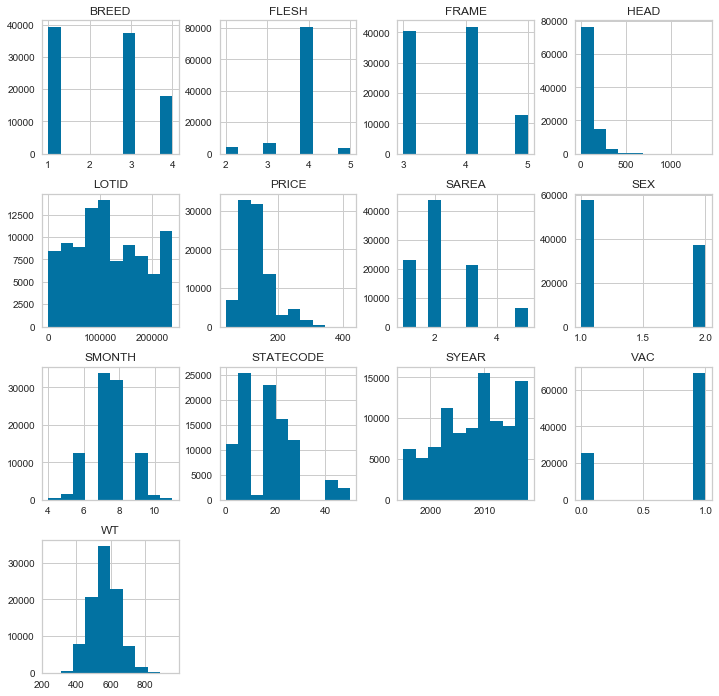

In [869]:
SLA.hist(figsize=(12,12))

In [870]:
SLA.corr()

,SYEAR,LOTID,SMONTH,HEAD,SEX,WT,PRICE,STATECODE,SAREA,BREED,FRAME,FLESH,VAC
SYEAR,1.000000,0.971616,-0.088036,-0.112701,-0.003453,0.125283,0.732215,-0.167889,-0.041601,-0.185266,-0.001793,-0.036868,0.432266
LOTID,0.971616,1.000000,-0.047674,-0.107917,-0.002026,0.116331,0.723935,-0.184238,-0.040155,-0.166417,0.007888,-0.038818,0.368652
SMONTH,-0.088036,-0.047674,1.000000,-0.016740,-0.001158,-0.085901,-0.083700,0.006256,-0.000927,0.042095,0.032692,-0.014937,-0.103688
HEAD,-0.112701,-0.107917,-0.016740,1.000000,-0.083927,-0.133153,-0.029359,-0.006816,-0.040767,-0.046834,-0.008735,-0.096600,-0.037788
SEX,-0.003453,-0.002026,-0.001158,-0.083927,1.000000,-0.233292,-0.089740,0.010311,0.015743,0.044483,-0.012067,-0.015052,-0.012702
WT,0.125283,0.116331,-0.085901,-0.133153,-0.233292,1.000000,-0.053411,-0.037952,-0.024189,-0.040775,0.216679,0.226646,0.091223
PRICE,0.732215,0.723935,-0.083700,-0.029359,-0.089740,-0.053411,1.000000,-0.123237,-0.075940,-0.177306,-0.017083,-0.073875,0.306816
STATECODE,-0.167889,-0.184238,0.006256,-0.006816,0.010311,-0.037952,-0.123237,1.000000,0.880773,0.362120,-0.138771,0.012126,-0.133954
SAREA,-0.041601,-0.040155,-0.000927,-0.040767,0.015743,-0.024189,-0.075940,0.880773,1.000000,0.407920,-0.161950,0.010374,-0.106852
BREED,-0.185266,-0.166417,0.042095,-0.046834,0.044483,-0.040775,-0.177306,0.362120,0.407920,1.000000,0.029630,-0.023344,-0.184929


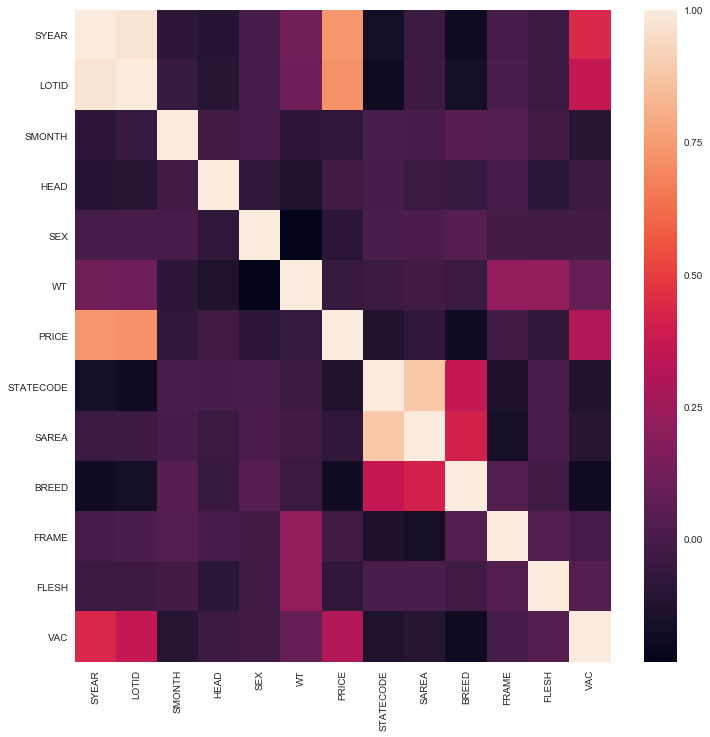

In [871]:
# heat map of correlation
plt.figure(figsize=(12,12))
sns.heatmap(SLA.corr())

Because of the large number of categorical variables in this dataset, correctly interpreting a correlation has limitations. 

In [872]:
#Exporting Data to CSV to use in Tableau for Data Visulaization
#Tableau charts shared in a PowerPoint File 
SLA.to_csv("data/SLA.csv")

## Model Building

### Continuous Variables

In [873]:
# test normality and to print three decimals only
WT = stats.normaltest(SLA['WT'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % WT

The chi-square statistic is 1401.546 and the p-value is 0.000.


C:\Users\Esther\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'WEIGHT OF LOTS DISTRIBUTION')

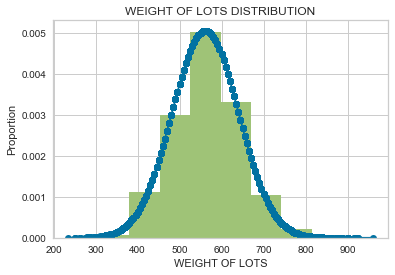

In [874]:
# an illustration distribution

WT = sorted(SLA['WT'])
fit = stats.norm.pdf(WT, np.mean(WT), np.std(WT))  #this is a fitting indeed
plt.plot(WT,fit,'-o')
plt.hist(WT,normed=True)      #use this to draw histogram of your data

plt.xlabel('WEIGHT OF LOTS')
plt.ylabel('Proportion')
plt.title("WEIGHT OF LOTS DISTRIBUTION")

#### The weight distribution of the lots appears normal.

In [875]:
# test normality and to print three decimals only
PRICE = stats.normaltest(SLA['PRICE'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % PRICE

The chi-square statistic is 20483.094 and the p-value is 0.000.


C:\Users\Esther\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'PRICE OF LOTS DISTRIBUTION')

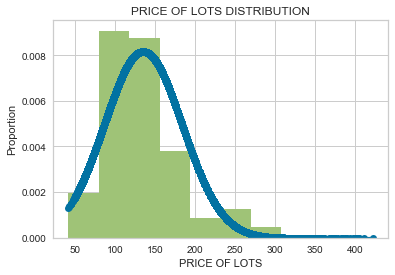

In [876]:
# an illustration distribution

PRICE = sorted(SLA['PRICE'])
fit = stats.norm.pdf(PRICE, np.mean(PRICE), np.std(PRICE))  #this is a fitting indeed
plt.plot(PRICE,fit,'-o')
plt.hist(PRICE,normed=True)      #use this to draw histogram of your data

plt.xlabel('PRICE OF LOTS')
plt.ylabel('Proportion')
plt.title("PRICE OF LOTS DISTRIBUTION")

#### As expected, there is a right skew to the price distribution. 

In [877]:
SLA['PRICEN']= np.log10(SLA['PRICE'])

In [878]:
# test normality and to print three decimals only
PRICE = stats.normaltest(SLA['PRICEN'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % PRICE

The chi-square statistic is 1087.250 and the p-value is 0.000.


C:\Users\Esther\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'PRICE OF LOTS DISTRIBUTION')

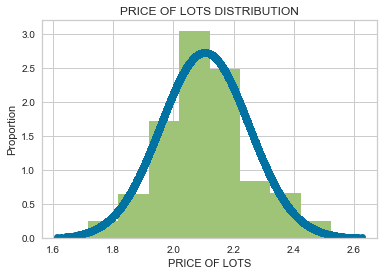

In [879]:
# an illustration distribution

PRICE = sorted(SLA['PRICEN'])
fit = stats.norm.pdf(PRICE, np.mean(PRICE), np.std(PRICE))  #this is a fitting indeed
plt.plot(PRICE,fit,'-o')
plt.hist(PRICE,normed=True)      #use this to draw histogram of your data

plt.xlabel('PRICE OF LOTS')
plt.ylabel('Proportion')
plt.title("PRICE OF LOTS DISTRIBUTION")

#### The transformation of the variable price resulted in a normal distribution.

In [880]:
# test normality and to print three decimals only
HEAD = stats.normaltest(SLA['HEAD'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % HEAD

The chi-square statistic is 68028.527 and the p-value is 0.000.


C:\Users\Esther\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'SIZE OF LOT DISTRIBUTION')

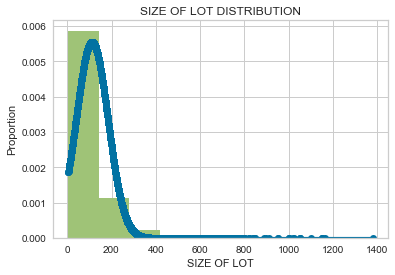

In [881]:
# an illustration distribution

HEAD = sorted(SLA['HEAD'])
fit = stats.norm.pdf(HEAD, np.mean(HEAD), np.std(HEAD))  #this is a fitting indeed
plt.plot(HEAD,fit,'-o')
plt.hist(HEAD,normed=True)      #use this to draw histogram of your data

plt.xlabel('SIZE OF LOT')
plt.ylabel('Proportion')
plt.title("SIZE OF LOT DISTRIBUTION")

#### As expected, there is a right skew to the size of lot distribution. 

In [882]:
SLA['HEADN']= np.log10(SLA['HEAD'])

In [883]:
# test normality and to print three decimals only
HEAD = stats.normaltest(SLA['HEADN'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % HEAD

The chi-square statistic is 5584.688 and the p-value is 0.000.


C:\Users\Esther\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'SIZE OF LOT DISTRIBUTION')

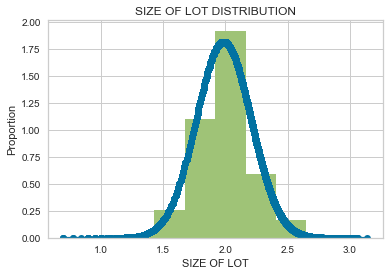

In [884]:
# an illustration distribution

HEAD = sorted(SLA['HEADN'])
fit = stats.norm.pdf(HEAD, np.mean(HEAD), np.std(HEAD))  #this is a fitting indeed
plt.plot(HEAD,fit,'-o')
plt.hist(HEAD,normed=True)      #use this to draw histogram of your data

plt.xlabel('SIZE OF LOT')
plt.ylabel('Proportion')
plt.title("SIZE OF LOT DISTRIBUTION")

#### The transformation of the variable head resulted in a normal distribution.

### Categorical Variables

In [885]:
SEXD = pd.get_dummies(SLA['SEX'], prefix='SEX')
SLA = SLA.join(SEXD)

In [886]:
SAREAD = pd.get_dummies(SLA['SAREA'], prefix='SAREA')
SLA = SLA.join(SAREAD)

In [887]:
BREEDD = pd.get_dummies(SLA['BREED'], prefix='BREED')
SLA = SLA.join(BREEDD)

In [888]:
FRAMED = pd.get_dummies(SLA['FRAME'], prefix='FRAME')
SLA = SLA.join(FRAMED)

In [889]:
FLESHD = pd.get_dummies(SLA['FLESH'], prefix='FLESH')
SLA = SLA.join(FLESHD)

In [890]:
VACD = pd.get_dummies(SLA['VAC'], prefix='VAC')
SLA = SLA.join(VACD)

In [891]:
YEARD = pd.get_dummies(SLA['SYEAR'], prefix='Y')
SLA = SLA.join(YEARD)

In [892]:
#now we can drop the orgional columns we created the dummy variables for
SLA1 = SLA.drop(['SEX', 'SAREA', 'BREED', 'FRAME', 'FLESH', 'VAC', 'SYEAR'], axis=1)
SLA1.head()

,LOTID,SMONTH,HEAD,WT,PRICE,STATE,STATECODE,PRICEN,HEADN,SEX_1,...,Y_2009,Y_2010,Y_2011,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018
0,1,6,115,425,81.25,OK,25,1.909823,2.060698,1,...,0,0,0,0,0,0,0,0,0,0
1,2,6,220,460,80.00,OK,25,1.903090,2.342423,1,...,0,0,0,0,0,0,0,0,0,0
2,3,6,84,570,77.00,MO,23,1.886491,1.924279,1,...,0,0,0,0,0,0,0,0,0,0
3,4,6,83,610,74.50,KS,22,1.872156,1.919078,1,...,0,0,0,0,0,0,0,0,0,0
4,5,6,155,625,68.10,MS,46,1.833147,2.190332,1,...,0,0,0,0,0,0,0,0,0,0


In [893]:
SLA1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94872 entries, 0 to 94871
Data columns (total 51 columns):
LOTID        94872 non-null int64
SMONTH       94872 non-null int64
HEAD         94872 non-null int64
WT           94872 non-null int64
PRICE        94872 non-null float64
STATE        94872 non-null object
STATECODE    94872 non-null int64
PRICEN       94872 non-null float64
HEADN        94872 non-null float64
SEX_1        94872 non-null uint8
SEX_2        94872 non-null uint8
SAREA_1      94872 non-null uint8
SAREA_2      94872 non-null uint8
SAREA_3      94872 non-null uint8
SAREA_5      94872 non-null uint8
BREED_1      94872 non-null uint8
BREED_3      94872 non-null uint8
BREED_4      94872 non-null uint8
FRAME_3      94872 non-null uint8
FRAME_4      94872 non-null uint8
FRAME_5      94872 non-null uint8
FLESH_2      94872 non-null uint8
FLESH_3      94872 non-null uint8
FLESH_4      94872 non-null uint8
FLESH_5      94872 non-null uint8
VAC_0        94872 non-null uint8


### With Dummy Variables

In [894]:
#assigning columns to X and Y variables
y = SLA['PRICEN'] 
X = SLA[['Y_1995','Y_1996','Y_1997','Y_1998','Y_1999','Y_2000','Y_2001','Y_2002','Y_2003','Y_2004','Y_2005','Y_2006','Y_2007','Y_2008','Y_2009','Y_2010','Y_2011','Y_2012','Y_2013','Y_2014','Y_2015','Y_2016','Y_2017','Y_2018','HEADN','WT','SEX_1','SEX_2','SAREA_1', 'SAREA_2', 'SAREA_3','SAREA_5','BREED_1','BREED_3','BREED_4','FRAME_3','FRAME_4','FRAME_5','FLESH_2','FLESH_3','FLESH_4','FLESH_5','VAC_0','VAC_1']]

In [895]:
# build a multiple regression model below
model1 = lm.LinearRegression()
model1.fit(X, y)   
model1_y = model1.predict(X)

In [896]:
print 'Coefficients: ', model1.coef_
print "y-intercept ", model1.intercept_

Coefficients:  [-4.30264232e+08 -4.30264232e+08 -4.30264232e+08 -4.30264232e+08
 -4.30264232e+08 -4.30264232e+08 -4.30264232e+08 -4.30264232e+08
 -4.30264232e+08 -4.30264232e+08 -4.30264232e+08 -4.30264232e+08
 -4.30264232e+08 -4.30264232e+08 -4.30264232e+08 -4.30264232e+08
 -4.30264232e+08 -4.30264232e+08 -4.30264232e+08 -4.30264232e+08
 -4.30264232e+08 -4.30264232e+08 -4.30264232e+08 -4.30264232e+08
  2.44926992e-02 -3.15360031e-04 -1.40679132e+06 -1.40679136e+06
  1.08694473e+07  1.08694473e+07  1.08694473e+07  1.08694473e+07
  1.01191998e+08  1.01191998e+08  1.01191998e+08 -5.74761115e+06
 -5.74761115e+06 -5.74761115e+06  5.54877659e+04  5.54877680e+04
  5.54877606e+04  5.54877580e+04 -1.84914220e+06 -1.84914219e+06]
y-intercept  327150845.4916382


In [897]:
print "mean square error: ", mean_squared_error(y, model1_y)
print "variance or r-squared: ", explained_variance_score(y, model1_y)

mean square error:  0.0005672211104114369
variance or r-squared:  0.9735776354563649


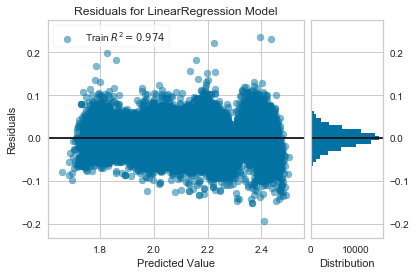

In [898]:
from yellowbrick.regressor import ResidualsPlot

y = SLA['PRICEN'] 
X = SLA[['Y_1995','Y_1996','Y_1997','Y_1998','Y_1999','Y_2000','Y_2001','Y_2002','Y_2003','Y_2004','Y_2005','Y_2006','Y_2007','Y_2008','Y_2009','Y_2010','Y_2011','Y_2012','Y_2013','Y_2014','Y_2015','Y_2016','Y_2017','Y_2018','HEADN','WT','SEX_1','SEX_2','SAREA_1', 'SAREA_2', 'SAREA_3','SAREA_5','BREED_1','BREED_3','BREED_4','FRAME_3','FRAME_4','FRAME_5','FLESH_2','FLESH_3','FLESH_4','FLESH_5','VAC_0','VAC_1']]
regre = lm.LinearRegression()
visualizer = ResidualsPlot(regre)

visualizer.fit(X, y)  # Fit the training data to the model
#visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data

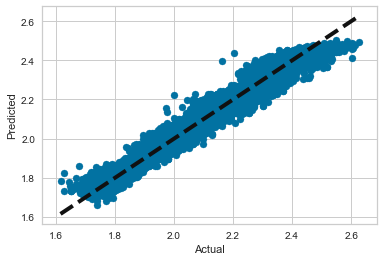

In [899]:
plt.subplots()
plt.scatter(y, model1_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [900]:
#First Model
runs_reg_model1 = ols("PRICEN~Y_1995+Y_1996+Y_1997+Y_1998+Y_1999+Y_2000+Y_2001+Y_2002+Y_2003+Y_2004+Y_2005+Y_2006+Y_2007+Y_2008+Y_2009+Y_2010+Y_2011+Y_2012+Y_2013+Y_2014+Y_2015+Y_2016+Y_2017+Y_2018+HEADN+WT+SEX_1+SEX_2+SAREA_1+SAREA_2+SAREA_3+SAREA_5+BREED_1+BREED_3+BREED_4+FRAME_3+FRAME_4+FRAME_5+FLESH_2+FLESH_3+FLESH_4+FLESH_5+VAC_0+VAC_1", SLA)
runs_reg1 = runs_reg_model1.fit()

In [901]:
print runs_reg1.summary()

                            OLS Regression Results                            
Dep. Variable:                 PRICEN   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 9.444e+04
Date:                Mon, 05 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:36:55   Log-Likelihood:             2.1996e+05
No. Observations:               94872   AIC:                        -4.398e+05
Df Residuals:                   94834   BIC:                        -4.395e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6823      0.000   2091.149      0.0

In [902]:
# high values indicate multicollinearity
print np.linalg.cond(runs_reg1.model.exog)

2.1053492349930898e+18


### Without Dummy Variables

In [903]:
y = SLA['PRICEN']
X = SLA[['HEADN', 'WT', 'SEX', 'SYEAR', 'SAREA', 'BREED', 'FRAME', 'FLESH', 'VAC']]

In [904]:
# build a multiple regression model below
model1 = lm.LinearRegression()
model1.fit(X, y)   
model1_y = model1.predict(X)

In [905]:
print "mean square error: ", mean_squared_error(y, model1_y)
print "variance or r-squared: ", explained_variance_score(y, model1_y)

mean square error:  0.006342825375604559
variance or r-squared:  0.7045377168877381


In [906]:
model = ols('PRICEN~SYEAR+SAREA+BREED+WT+HEADN+FRAME+FLESH+VAC+SEX', SLA).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 PRICEN   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                 2.513e+04
Date:                Mon, 05 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:36:58   Log-Likelihood:             1.0543e+05
No. Observations:               94872   AIC:                        -2.108e+05
Df Residuals:                   94862   BIC:                        -2.107e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.6512      0.094   -380.902      0.0

## Model Evaluation and Refinement

In [907]:
runs_reg_model1 = ols("PRICE~Y_1995+Y_1996+Y_1997+Y_1998+Y_1999+Y_2000+Y_2001+Y_2002+Y_2003+Y_2004+Y_2005+Y_2006+Y_2007+Y_2008+Y_2009+Y_2010+Y_2011+Y_2012+Y_2013+Y_2014+Y_2015+Y_2016+Y_2017+Y_2018+HEAD+WT+SEX_1+SEX_2+SAREA_1+SAREA_2+SAREA_3+SAREA_5+BREED_1+BREED_3+BREED_4+FRAME_3+FRAME_4+FRAME_5+FLESH_2+FLESH_3+FLESH_4+FLESH_5+VAC_0+VAC_1", SLA)
runs_reg1 = runs_reg_model1.fit()

In [908]:
print runs_reg1.summary()

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 5.779e+04
Date:                Mon, 05 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:36:59   Log-Likelihood:            -3.5372e+05
No. Observations:               94872   AIC:                         7.075e+05
Df Residuals:                   94834   BIC:                         7.079e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.7564      0.086    658.321      0.0

In [909]:
runs_reg_model1 = ols("PRICE~Y_1995+Y_1996+Y_1997+Y_1998+Y_1999+Y_2000+Y_2001+Y_2002+Y_2003+Y_2004+Y_2005+Y_2006+Y_2007+Y_2008+Y_2009+Y_2010+Y_2011+Y_2012+Y_2013+Y_2014+Y_2015+Y_2016+Y_2017+Y_2018+HEADN+WT+SEX_1+SEX_2+SAREA_1+SAREA_2+SAREA_3+SAREA_5+BREED_1+BREED_3+BREED_4+FRAME_3+FRAME_4+FRAME_5+FLESH_2+FLESH_3+FLESH_4+FLESH_5+VAC_0+VAC_1", SLA)
runs_reg1 = runs_reg_model1.fit()

In [910]:
print runs_reg1.summary()

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 5.872e+04
Date:                Mon, 05 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:37:00   Log-Likelihood:            -3.5300e+05
No. Observations:               94872   AIC:                         7.061e+05
Df Residuals:                   94834   BIC:                         7.064e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.5872      0.137    376.862      0.0

#### Remove sale year 2004

In [911]:
runs_reg_model1 = ols("PRICE~Y_1995+Y_1996+Y_1997+Y_1998+Y_1999+Y_2000+Y_2001+Y_2002+Y_2003+Y_2005+Y_2006+Y_2007+Y_2008+Y_2009+Y_2010+Y_2011+Y_2012+Y_2013+Y_2014+Y_2015+Y_2016+Y_2017+Y_2018+HEADN+WT+SEX_1+SEX_2+SAREA_1+SAREA_2+SAREA_3+SAREA_5+BREED_1+BREED_3+BREED_4+FRAME_3+FRAME_4+FRAME_5+FLESH_2+FLESH_3+FLESH_4+FLESH_5+VAC_0+VAC_1", SLA)
runs_reg1 = runs_reg_model1.fit()
print runs_reg1.summary()

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 5.872e+04
Date:                Mon, 05 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:37:01   Log-Likelihood:            -3.5300e+05
No. Observations:               94872   AIC:                         7.061e+05
Df Residuals:                   94834   BIC:                         7.064e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.6168      0.148    348.479      0.0

#### Remove sale year 2006

In [912]:
runs_reg_model1 = ols("PRICE~Y_1995+Y_1996+Y_1997+Y_1998+Y_1999+Y_2000+Y_2001+Y_2002+Y_2003+Y_2005+Y_2007+Y_2008+Y_2009+Y_2010+Y_2011+Y_2012+Y_2013+Y_2014+Y_2015+Y_2016+Y_2017+Y_2018+HEADN+WT+SEX_1+SEX_2+SAREA_1+SAREA_2+SAREA_3+SAREA_5+BREED_1+BREED_3+BREED_4+FRAME_3+FRAME_4+FRAME_5+FLESH_2+FLESH_3+FLESH_4+FLESH_5+VAC_0+VAC_1", SLA)
runs_reg1 = runs_reg_model1.fit()
print runs_reg1.summary()

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 6.035e+04
Date:                Mon, 05 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:37:02   Log-Likelihood:            -3.5300e+05
No. Observations:               94872   AIC:                         7.061e+05
Df Residuals:                   94835   BIC:                         7.064e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.6246      0.144    357.530      0.0

## Final Model

### In SAS 9.4
data SLA;
infile 'C:\Users\Esther\Documents\K-State Graduate School\Classes\PhD\GENBA 894\DATA\SLA.txt' firstobs=2 dlm='09'X;
input SYEAR LOTID SMONTH HEAD SEX WT PRICE STATE $ STATECODE SAREA BREED FRAME FLESH VAC;
run;

proc print data=SLA (obs=15);
run;

proc freq;
tables SYEAR SAREA BREED FRAME FLESH VAC;
QUIT;

proc MEANS N MEAN STD MEDIAM MIN MAX;
var HEAD WT PRICE;
quit;

proc mixed;
class SYEAR SEX SAREA BREED FRAME FLESH VAC;
model price = SYEAR WT SEX SAREA BREED FRAME FLESH VAC HEAD/solution ddfm=BETWITHIN;
RANDOM SMONTH(SYEAR)/SOLUTION;
lsmeans SYEAR SEX SAREA BREED FRAME FLESH VAC/adjust=tukey;
quit;

run;

## Model Validation

In [913]:
# import dataset
SLA1=pd.read_csv("DATA/SLA.csv")
SLA1.head()

,Unnamed: 0,SYEAR,LOTID,SMONTH,HEAD,SEX,WT,PRICE,STATE,STATECODE,SAREA,BREED,FRAME,FLESH,VAC
0,0,1995,1,6,115,1,425,81.25,OK,25,3,3,4,4,1
1,1,1995,2,6,220,1,460,80.00,OK,25,3,3,4,4,1
2,2,1995,3,6,84,1,570,77.00,MO,23,3,1,4,4,1
3,3,1995,4,6,83,1,610,74.50,KS,22,3,3,5,4,0
4,4,1995,5,6,155,1,625,68.10,MS,46,5,4,3,4,0


In [914]:
SLA1 = SLA1.drop(['Unnamed: 0', 'LOTID', 'STATE', 'STATECODE'], axis=1)
SLA1.head()

,SYEAR,SMONTH,HEAD,SEX,WT,PRICE,SAREA,BREED,FRAME,FLESH,VAC
0,1995,6,115,1,425,81.25,3,3,4,4,1
1,1995,6,220,1,460,80.00,3,3,4,4,1
2,1995,6,84,1,570,77.00,3,1,4,4,1
3,1995,6,83,1,610,74.50,3,3,5,4,0
4,1995,6,155,1,625,68.10,5,4,3,4,0


In [915]:
SLA1 = SLA1.astype({"PRICE": int, "WT": int, "HEAD":int})

In [916]:
y = SLA1['PRICE'] 
X = SLA1[['SYEAR','SAREA','BREED','WT','HEAD','FRAME','SEX', 'VAC']]

In [917]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(SLA1, y, test_size=0.3)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(66410, 11) (66410L,)
(28462, 11) (28462L,)


In [918]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [919]:
predictions[0:5]

array([ 74., 125., 173., 158., 226.])

Text(0,0.5,'Predictions')

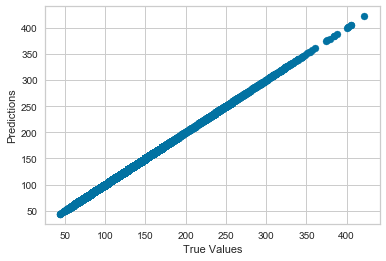

In [920]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [921]:
print 'Score:', model.score(X_test, y_test)

Score: 1.0


In [922]:
# evaluate the decision tree model using 10-fold cross-validation
scores = cross_val_score(dt, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[0.03292266 0.04167969 0.04877028 0.04546886 0.04213187 0.03835182
 0.04071247 0.04526618 0.04626372 0.04061999]
0.042218755176322675


In [923]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize DecisionTreeClassifier()
dt = DecisionTreeClassifier()

# Train a decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [924]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
#print metrics.roc_auc_score(y_test, dt.predict(X_test))

# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the predicted y value generated by your model
# If they are same, we can say your model is accurate.

0.0730961791831357
--------------------------------------------------------
[[0 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
--------------------------------------------------------
             precision    recall  f1-score   support

         41       0.00      0.00      0.00         0
         44       0.67      0.67      0.67         3
         46       0.00      0.00      0.00         0
         47       0.00      0.00      0.00         1
         48       0.20      0.33      0.25         3
         49       0.00      0.00      0.00         0
         50       0.00      0.00      0.00         7
         51       0.67      0.25      0.36         8
         52       0.00      0.00      0.00         4
         53       0.08      0.11      0.10         9
         54       0.06      0.07      0.06        14
         55       0.00      0.00      0.00        14
         56       0.03      0.06      0.04        18
    

C:\Users\Esther\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Esther\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# Lots of Feeder Cattle

Lots of feeder cattle are included in the dataset as well, however, feeder cattle lots are not as frequent and do not appear every year (present 1996 - 2018).  

#### Variables:
- SYEAR: Sale Year 1995 - 2018
- LOTID: Count of number of lots of beef calves
- SMONTH: Sale Month 1=January, 12=December
- SUMMER: Sold in a summer sale, all 1=Yes (Will remove, all are summer)
- HEAD: Number of calves in a lot
- SEX: Gender of lot, 1=Steer, 2=Heifer
- ATYPE: Animal Type, 2 = Feeder (Will removed column, all are feeders)
- WT: Average weight of the lot (total lot weight/# of head in lot)
- PRICE: Sale Price of lot ($/cwt)
- STATE: STate of origin of lot
- STATECODE: Code of state, alphabetical order starting with 1
- SAREA: Sale area, the states are divided into five areas or regions, 1=West Coast, 2=Rocky Mountain/North Central, 3=South Central, 4=Northeast, 5=Southeast
- BREED: General breed of the lot, 1=English, English crossed, 3=English-Contenintal crossed, 4=Brahman-influenced
- FRAME: Frame score of calves in lot, 3=Small, 4=Medium, 5=Large
- FLESH: Amount of flesh (body condition) of calves in lot, 2=Light, 3=Light/Medium, 4=Medium, 5=Heavy
- VAC: Vaccinations of lot, 0=vaccinated but not qualified for program, 1=vaccinated and qualify for program

In [925]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://www.amscattle.com/wp-content/uploads/2013/02/DSCN7633.jpg")

In [926]:
# import dataset
FEEDER=pd.read_csv("DATA/FEEDER.csv")
FEEDER.head()

,SYEAR,LOTID,SUMMER,SMONTH,HEAD,SEX,ATYPE,WT,PRICE,STATE,STATECODE,SAREA,BREED,FRAME,FLESH,VAC
0,2010,111922,1,6,39,1,2,640,105.25,TX,26,3,4,4,4,0
1,2010,111923,1,6,39,2,2,640,98.25,TX,26,3,4,4,4,0
2,2010,111924,1,6,35,1,2,700,105.50,LA,45,5,4,3,2,0
3,2010,111925,1,6,35,2,2,700,99.50,LA,45,5,4,3,2,0
4,2010,111926,1,6,32,1,2,735,105.25,TX,26,3,4,4,4,1


## Data Transformation

In [927]:
#data types & missing values
FEEDER.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23862 entries, 0 to 23861
Data columns (total 16 columns):
SYEAR        23862 non-null int64
LOTID        23862 non-null int64
SUMMER       23862 non-null int64
SMONTH       23862 non-null int64
HEAD         23862 non-null int64
SEX          23862 non-null int64
ATYPE        23862 non-null int64
WT           23862 non-null int64
PRICE        23862 non-null float64
STATE        23862 non-null object
STATECODE    23862 non-null int64
SAREA        23862 non-null int64
BREED        23862 non-null int64
FRAME        23862 non-null int64
FLESH        23862 non-null int64
VAC          23862 non-null int64
dtypes: float64(1), int64(14), object(1)
memory usage: 2.9+ MB


#### There are no missing values.

In [928]:
# remove unnecessary columnS
FEEDER = FEEDER.drop(['SUMMER','ATYPE'], axis=1)
FEEDER.head()

,SYEAR,LOTID,SMONTH,HEAD,SEX,WT,PRICE,STATE,STATECODE,SAREA,BREED,FRAME,FLESH,VAC
0,2010,111922,6,39,1,640,105.25,TX,26,3,4,4,4,0
1,2010,111923,6,39,2,640,98.25,TX,26,3,4,4,4,0
2,2010,111924,6,35,1,700,105.50,LA,45,5,4,3,2,0
3,2010,111925,6,35,2,700,99.50,LA,45,5,4,3,2,0
4,2010,111926,6,32,1,735,105.25,TX,26,3,4,4,4,1


In [929]:
# value count but using describe 
FEEDER.groupby('STATE').size()

STATE
AL     176
AR    1401
AZ     231
CA     219
CO    1657
FL      76
GA     245
IA     433
ID     671
IL      91
IN       6
KS    4203
KY      61
LA     294
ME       1
MI      74
MN      37
MO     745
MS     120
MT     740
NC     180
ND     136
NE    1025
NM     509
NV     882
NY       6
OH       7
OK    2232
OR    1053
PA       1
SC      23
SD     251
TN      59
TX    4389
UT     520
VA      26
WA      83
WI      89
WV      22
WY     871
ar       2
ok       5
tx      10
dtype: int64

In [930]:
FEEDER = FEEDER.replace({'STATE': 'ar'}, {'STATE': 'AR'})

In [931]:
FEEDER = FEEDER.replace({'STATE': 'ok'}, {'STATE': 'OK'})

In [932]:
FEEDER = FEEDER.replace({'STATE': 'tx'}, {'STATE': 'TX'})

### Combining Groups

#### VAC

In [933]:
# value count but using describe 
FEEDER.groupby('VAC').size()

VAC
0    19841
1     4021
dtype: int64

#### There were 19,841 lots not qualifed for a vaccination program and 4,021 lots qualifed for a vaccination program.

#### FRAME

In [934]:
# value count but using describe 
FEEDER.groupby('FRAME').size()

FRAME
1       13
2      149
3     7890
4    11727
5     3549
6      479
7       55
dtype: int64

In [935]:
FEEDER = FEEDER.replace({'FRAME': 1}, {'FRAME': 3})

In [936]:
FEEDER = FEEDER.replace({'FRAME': 2}, {'FRAME': 3})

In [937]:
FEEDER = FEEDER.replace({'FRAME': 7}, {'FRAME': 5})

In [938]:
FEEDER = FEEDER.replace({'FRAME': 6}, {'FRAME': 5})

In [939]:
# value count but using describe 
FEEDER.groupby('FRAME').size()

FRAME
3     8052
4    11727
5     4083
dtype: int64

#### Frame scores 1 and two were small and combined with group 3. Frame scores 6 and 7 were small and combined with 5. This leaves group 3=small, 4=medium, and 5=large.

#### FLESH

In [940]:
# value count but using describe 
FEEDER.groupby('FLESH').size()

FLESH
1       26
2     1029
3     1668
4    19979
5      796
6      362
7        2
dtype: int64

In [941]:
FEEDER = FEEDER.replace({'FLESH': 1}, {'FLESH': 2})

In [942]:
FEEDER = FEEDER.replace({'FLESH': 7}, {'FLESH': 5})

In [943]:
FEEDER = FEEDER.replace({'FLESH': 6}, {'FLESH': 5})

In [944]:
# value count but using describe 
FEEDER.groupby('FLESH').size()

FLESH
2     1055
3     1668
4    19979
5     1160
dtype: int64

#### Flesh score 1 was small and combined with group 2. Flesh scores 6 and 7 were small and combined with 5. This leaves the final groups of 2=light, 3=light/medium, 4=medium, and 5=heavy.

#### BREED

In [945]:
# value count but using describe 
FEEDER.groupby('BREED').size()

BREED
1    5263
3    9095
4    9504
dtype: int64

#### The breed composition of lots of feeder cattle were 5,263 lots of English, English crossed, 9,095 lots of English-Continental crossed, and 9,504 lots of Brahman-influenced.

#### SAREA

In [946]:
FEEDER.groupby('SAREA').size()

SAREA
1     3428
2     5410
3    12324
4       37
5     2663
dtype: int64

In [947]:
FEEDER = FEEDER.replace({'SAREA': 4}, {'SAREA': 5})

In [948]:
# value count but using describe 
FEEDER.groupby('SAREA').size()

SAREA
1     3428
2     5410
3    12324
5     2700
dtype: int64

#### SAREA 4 was small and combined with SAREA 5.

## Exploratory Data Analysis

In [949]:
#Describe shows a quick statistic summary of your data
#this is a good way to examine the numerical columns
FEEDER.describe()

,SYEAR,LOTID,SMONTH,HEAD,SEX,WT,PRICE,STATECODE,SAREA,BREED,FRAME,FLESH,VAC
count,23862.000000,23862.000000,23862.000000,23862.000000,23862.000000,23862.000000,23862.000000,23862.000000,23862.000000,23862.000000,23862.000000,23862.000000,23862.000000
mean,2006.862794,102383.966181,7.381779,125.887646,1.387436,783.060096,114.905306,20.295658,2.712262,2.957170,3.833669,3.890286,0.168511
std,6.809251,68804.910226,1.265613,115.485876,0.487175,84.878691,40.284065,11.163846,1.082227,1.130818,0.693472,0.532297,0.374327
min,1996.000000,2935.000000,4.000000,4.000000,1.000000,420.000000,45.000000,0.000000,1.000000,1.000000,3.000000,2.000000,0.000000
25%,2001.000000,41040.500000,7.000000,63.000000,1.000000,725.000000,82.500000,10.000000,2.000000,3.000000,3.000000,4.000000,0.000000
50%,2005.000000,85380.500000,7.000000,74.000000,1.000000,780.000000,108.000000,22.000000,3.000000,3.000000,4.000000,4.000000,0.000000
75%,2013.000000,159297.750000,8.000000,140.000000,2.000000,840.000000,137.825000,26.000000,3.000000,4.000000,4.000000,4.000000,0.000000
max,2018.000000,238997.000000,11.000000,1800.000000,2.000000,1125.000000,267.000000,50.000000,5.000000,4.000000,5.000000,5.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000054539CF8>,
      dtype=object)

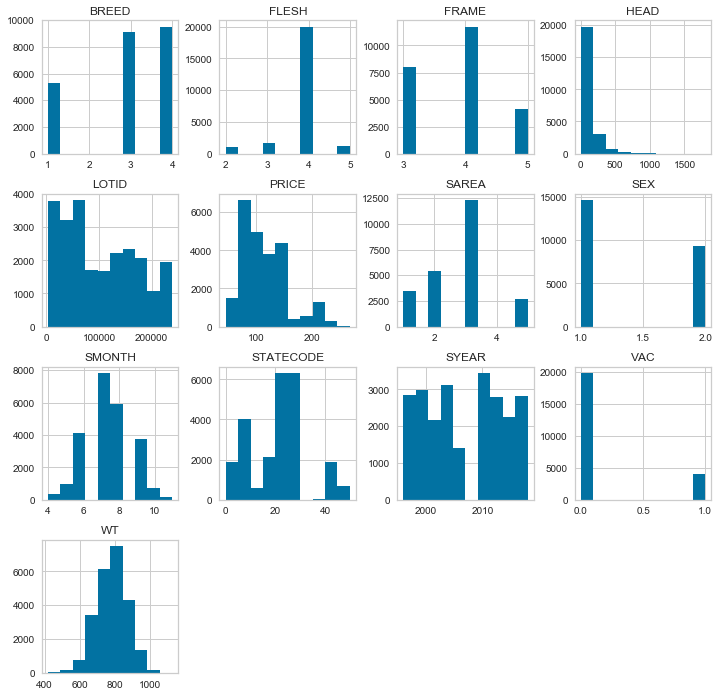

In [950]:
FEEDER.hist(figsize=(12,12))

In [951]:
FEEDER.corr()

,SYEAR,LOTID,SMONTH,HEAD,SEX,WT,PRICE,STATECODE,SAREA,BREED,FRAME,FLESH,VAC
SYEAR,1.000000,0.990944,-0.103676,-0.041727,-0.057300,0.246894,0.835596,-0.168724,-0.039077,-0.225968,0.138352,-0.035072,0.365210
LOTID,0.990944,1.000000,-0.064766,-0.042079,-0.053624,0.241405,0.832601,-0.193013,-0.040503,-0.226524,0.145319,-0.032461,0.366607
SMONTH,-0.103676,-0.064766,1.000000,-0.023245,0.002478,-0.106987,-0.081078,-0.005845,-0.012720,0.013944,-0.029735,-0.007994,-0.009123
HEAD,-0.041727,-0.042079,-0.023245,1.000000,-0.067081,0.083327,-0.025014,-0.087257,-0.105415,0.022269,-0.000113,-0.005740,-0.067963
SEX,-0.057300,-0.053624,0.002478,-0.067081,1.000000,-0.369070,-0.100595,0.060387,0.069802,0.043131,-0.078557,0.001504,-0.012612
WT,0.246894,0.241405,-0.106987,0.083327,-0.369070,1.000000,0.181884,-0.250077,-0.256010,-0.318067,0.179771,0.172594,0.032489
PRICE,0.835596,0.832601,-0.081078,-0.025014,-0.100595,0.181884,1.000000,-0.106882,-0.050853,-0.206481,0.129784,-0.039477,0.302515
STATECODE,-0.168724,-0.193013,-0.005845,-0.087257,0.060387,-0.250077,-0.106882,1.000000,0.876676,0.392879,-0.058890,-0.087592,-0.013126
SAREA,-0.039077,-0.040503,-0.012720,-0.105415,0.069802,-0.256010,-0.050853,0.876676,1.000000,0.406660,-0.021669,-0.082012,0.040139
BREED,-0.225968,-0.226524,0.013944,0.022269,0.043131,-0.318067,-0.206481,0.392879,0.406660,1.000000,0.009941,-0.059608,-0.113540


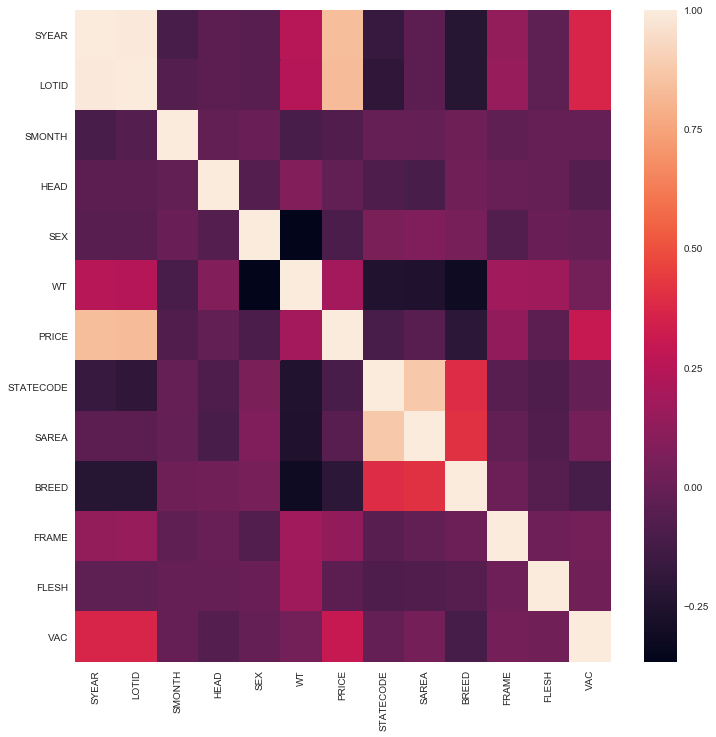

In [952]:
# heat map of correlation
plt.figure(figsize=(12,12))
sns.heatmap(FEEDER.corr())

Because of the large number of categorical variables in this dataset, correctly interpreting a correlation has limitations. 

In [953]:
#Exporting Data to CSV to use in Tableau for Data Visulaization 
#Tableau charts shared in a PowerPoint File 
FEEDER.to_csv("data/FEEDER1.csv")

## Model Building

In [954]:
# test normality and to print three decimals only
WT = stats.normaltest(FEEDER['WT'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % WT

The chi-square statistic is 99.626 and the p-value is 0.000.


C:\Users\Esther\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'WEIGHT OF LOTS DISTRIBUTION')

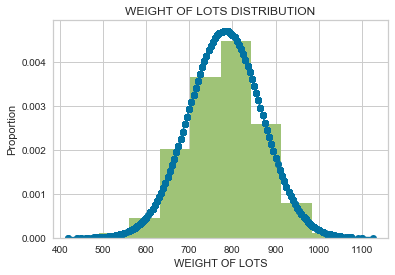

In [955]:
# an illustration distribution

WT = sorted(FEEDER['WT'])
fit = stats.norm.pdf(WT, np.mean(WT), np.std(WT))  #this is a fitting indeed
plt.plot(WT,fit,'-o')
plt.hist(WT,normed=True)      #use this to draw histogram of your data

plt.xlabel('WEIGHT OF LOTS')
plt.ylabel('Proportion')
plt.title("WEIGHT OF LOTS DISTRIBUTION")

#### The weight distribution of the lots appears normal.

In [956]:
# test normality and to print three decimals only
PRICE = stats.normaltest(FEEDER['PRICE'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % PRICE

The chi-square statistic is 2992.237 and the p-value is 0.000.


C:\Users\Esther\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'PRICE OF LOTS DISTRIBUTION')

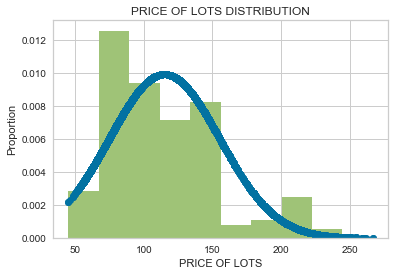

In [957]:
# an illustration distribution

PRICE = sorted(FEEDER['PRICE'])
fit = stats.norm.pdf(PRICE, np.mean(PRICE), np.std(PRICE))  #this is a fitting indeed
plt.plot(PRICE,fit,'-o')
plt.hist(PRICE,normed=True)      #use this to draw histogram of your data

plt.xlabel('PRICE OF LOTS')
plt.ylabel('Proportion')
plt.title("PRICE OF LOTS DISTRIBUTION")

#### As expected, there is a right skew to the price distribution. 

In [958]:
FEEDER['PRICEN']= np.log10(FEEDER['PRICE'])

In [959]:
# test normality and to print three decimals only
PRICE = stats.normaltest(FEEDER['PRICEN'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % PRICE


The chi-square statistic is 795.993 and the p-value is 0.000.


C:\Users\Esther\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'PRICE OF LOTS DISTRIBUTION')

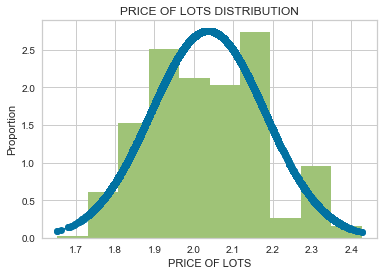

In [960]:
# an illustration distribution

PRICE = sorted(FEEDER['PRICEN'])
fit = stats.norm.pdf(PRICE, np.mean(PRICE), np.std(PRICE))  #this is a fitting indeed
plt.plot(PRICE,fit,'-o')
plt.hist(PRICE,normed=True)      #use this to draw histogram of your data

plt.xlabel('PRICE OF LOTS')
plt.ylabel('Proportion')
plt.title("PRICE OF LOTS DISTRIBUTION")

#### The transformation of the variable price resulted in a near normal distribution.

In [961]:
# test normality and to print three decimals only
HEAD = stats.normaltest(FEEDER['HEAD'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % HEAD

The chi-square statistic is 19084.236 and the p-value is 0.000.


C:\Users\Esther\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'SIZE OF LOT DISTRIBUTION')

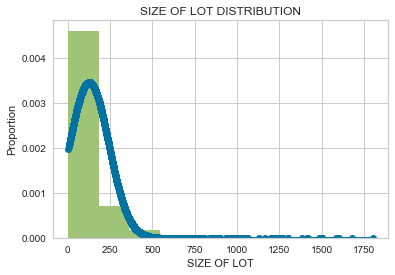

In [962]:
# an illustration distribution

HEAD = sorted(FEEDER['HEAD'])
fit = stats.norm.pdf(HEAD, np.mean(HEAD), np.std(HEAD))  #this is a fitting indeed
plt.plot(HEAD,fit,'-o')
plt.hist(HEAD,normed=True)      #use this to draw histogram of your data

plt.xlabel('SIZE OF LOT')
plt.ylabel('Proportion')
plt.title("SIZE OF LOT DISTRIBUTION")

#### As expected, there is a right skew to the size of lot distribution. 

In [963]:
FEEDER['HEADN']= np.log10(FEEDER['HEAD'])

In [964]:
# test normality and to print three decimals only
HEAD = stats.normaltest(FEEDER['HEADN'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % HEAD

The chi-square statistic is 2180.056 and the p-value is 0.000.


C:\Users\Esther\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'SIZE OF LOT DISTRIBUTION')

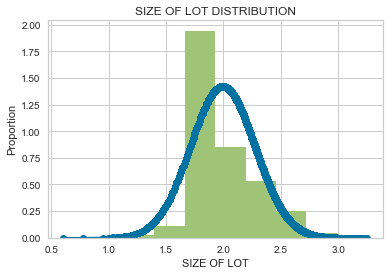

In [965]:
# an illustration distribution

HEAD = sorted(FEEDER['HEADN'])
fit = stats.norm.pdf(HEAD, np.mean(HEAD), np.std(HEAD))  #this is a fitting indeed
plt.plot(HEAD,fit,'-o')
plt.hist(HEAD,normed=True)      #use this to draw histogram of your data

plt.xlabel('SIZE OF LOT')
plt.ylabel('Proportion')
plt.title("SIZE OF LOT DISTRIBUTION")

#### The transformation of the variable head resulted in a normal distribution.

### Categorical Variables

In [966]:
SEXD = pd.get_dummies(FEEDER['SEX'], prefix='SEX')
FEEDER = FEEDER.join(SEXD)

In [967]:
SAREAD = pd.get_dummies(FEEDER['SAREA'], prefix='SAREA')
FEEDER = FEEDER.join(SAREAD)

In [968]:
BREEDD = pd.get_dummies(FEEDER['BREED'], prefix='BREED')
FEEDER = FEEDER.join(BREEDD)

In [969]:
FRAMED = pd.get_dummies(FEEDER['FRAME'], prefix='FRAME')
FEEDER = FEEDER.join(FRAMED)

In [970]:
FLESHD = pd.get_dummies(FEEDER['FLESH'], prefix='FLESH')
FEEDER = FEEDER.join(FLESHD)

In [971]:
VACD = pd.get_dummies(FEEDER['VAC'], prefix='VAC')
FEEDER = FEEDER.join(VACD)

In [972]:
YEARD = pd.get_dummies(FEEDER['SYEAR'], prefix='Y')
FEEDER = FEEDER.join(YEARD)

In [973]:
#now we can drop the orgional columns we created the dummy variables for
FEEDER1 = FEEDER.drop(['SEX', 'SAREA', 'BREED', 'FRAME', 'FLESH', 'VAC', 'SYEAR'], axis=1)
FEEDER1.head()

,LOTID,SMONTH,HEAD,WT,PRICE,STATE,STATECODE,PRICEN,HEADN,SEX_1,...,Y_2005,Y_2010,Y_2011,Y_2012,Y_2013,Y_2014,Y_2015,Y_2016,Y_2017,Y_2018
0,111922,6,39,640,105.25,TX,26,2.022222,1.591065,1,...,0,1,0,0,0,0,0,0,0,0
1,111923,6,39,640,98.25,TX,26,1.992333,1.591065,0,...,0,1,0,0,0,0,0,0,0,0
2,111924,6,35,700,105.50,LA,45,2.023252,1.544068,1,...,0,1,0,0,0,0,0,0,0,0
3,111925,6,35,700,99.50,LA,45,1.997823,1.544068,0,...,0,1,0,0,0,0,0,0,0,0
4,111926,6,32,735,105.25,TX,26,2.022222,1.505150,1,...,0,1,0,0,0,0,0,0,0,0


### With Dummy Variables

In [974]:
y = FEEDER['PRICEN'] 
X = FEEDER[['Y_1996','Y_1997','Y_1998','Y_1999','Y_2000','Y_2001','Y_2002','Y_2003','Y_2004','Y_2005','Y_2010','Y_2011','Y_2012','Y_2013','Y_2014','Y_2015','Y_2016','Y_2017','Y_2018','HEADN','WT','SEX_1','SEX_2','SAREA_1', 'SAREA_2', 'SAREA_3','SAREA_5','BREED_1','BREED_3','BREED_4','FRAME_3','FRAME_4','FRAME_5','FLESH_2','FLESH_3','FLESH_4','FLESH_5','VAC_0','VAC_1']]

In [978]:
model1 = lm.LinearRegression()
model1.fit(X, y)   
model1_y = model1.predict(X)

In [979]:
print "mean square error: ", mean_squared_error(y, model1_y)
print "variance or r-squared: ", explained_variance_score(y, model1_y)

mean square error:  0.0003914292850825234
variance or r-squared:  0.9813259282761732


In [980]:
print 'Coefficients: ', model1.coef_
print "y-intercept ", model1.intercept_

Coefficients:  [-6.76580161e+02 -6.76462822e+02 -6.76543999e+02 -6.76482817e+02
 -6.76434212e+02 -6.76413564e+02 -6.76477821e+02 -6.76402866e+02
 -6.76320384e+02 -6.76325593e+02 -6.76323381e+02 -6.76249343e+02
 -6.76216045e+02 -6.76197998e+02 -6.76032709e+02 -6.76037001e+02
 -6.76220170e+02 -6.76200245e+02 -6.76191594e+02  1.08948870e-02
 -1.72206165e-04  7.36567139e+06  7.36567137e+06  3.80111412e+07
  3.80111412e+07  3.80111412e+07  3.80111412e+07  1.98565992e+08
  1.98565992e+08  1.98565992e+08 -9.94044909e+06 -9.94044909e+06
 -9.94044909e+06 -1.87179436e+07 -1.87179436e+07 -1.87179436e+07
 -1.87179436e+07  2.45473760e+07  2.45473760e+07]
y-intercept  -239831109.69693306


In [981]:
#First Model
runs_reg_model1 = ols("PRICEN~Y_1996+Y_1997+Y_1998+Y_1999+Y_2000+Y_2001+Y_2002+Y_2003+Y_2004+Y_2005+Y_2010+Y_2011+Y_2012+Y_2013+Y_2014+Y_2015+Y_2016+Y_2017+Y_2018+HEADN+WT+SEX_1+SEX_2+SAREA_1+SAREA_2+SAREA_3+SAREA_5+BREED_1+BREED_3+BREED_4+FRAME_3+FRAME_4+FRAME_5+FLESH_2+FLESH_3+FLESH_4+FLESH_5+VAC_0+VAC_1", FEEDER)
runs_reg1 = runs_reg_model1.fit()

In [982]:
print runs_reg1.summary()

                            OLS Regression Results                            
Dep. Variable:                 PRICEN   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                 3.913e+04
Date:                Mon, 05 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:39:05   Log-Likelihood:                 59748.
No. Observations:               23862   AIC:                        -1.194e+05
Df Residuals:                   23829   BIC:                        -1.192e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6650      0.001   1245.561      0.0

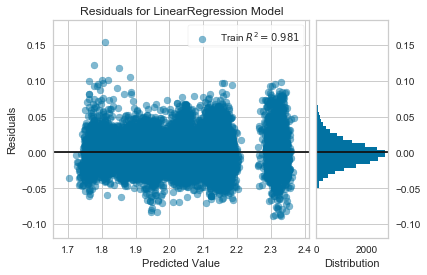

In [983]:
y = FEEDER['PRICEN'] 
X = FEEDER[['Y_1996','Y_1997','Y_1998','Y_1999','Y_2000','Y_2001','Y_2002','Y_2003','Y_2004','Y_2005','Y_2010','Y_2011','Y_2012','Y_2013','Y_2014','Y_2015','Y_2016','Y_2017','Y_2018','HEADN','WT','SEX_1','SEX_2','SAREA_1', 'SAREA_2', 'SAREA_3','SAREA_5','BREED_1','BREED_3','BREED_4','FRAME_3','FRAME_4','FRAME_5','FLESH_2','FLESH_3','FLESH_4','FLESH_5','VAC_0','VAC_1']]
regre = lm.LinearRegression()
visualizer = ResidualsPlot(regre)

visualizer.fit(X, y)  # Fit the training data to the model
#visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data


In [984]:
# high values indicate multicollinearity
print np.linalg.cond(runs_reg1.model.exog)

4.768354513118901e+18


In [985]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(random_state=0)
regr.fit(X, y)
regr_predicted = regr.predict(X)

print "mean square error: ", mean_squared_error(y, regr_predicted)
print "variance or r-squared: ", explained_variance_score(y, regr_predicted)

mean square error:  8.527963384756628e-05
variance or r-squared:  0.9959315348290748


### Without Dummy Variables

In [986]:
y = FEEDER['PRICEN']
X = FEEDER[['HEADN', 'WT', 'SEX', 'SYEAR', 'SAREA', 'BREED', 'FRAME', 'FLESH', 'VAC']]

In [987]:
# build a multiple regression model below
model1 = lm.LinearRegression()
model1.fit(X, y)   
model1_y = model1.predict(X)

In [988]:
print "mean square error: ", mean_squared_error(y, model1_y)
print "variance or r-squared: ", explained_variance_score(y, model1_y)

mean square error:  0.004146734547736711
variance or r-squared:  0.8021700947904458


In [989]:
model = ols('PRICEN~SYEAR+SAREA+BREED+WT+HEADN+FRAME+FLESH+VAC+SEX', FEEDER).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 PRICEN   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                 1.075e+04
Date:                Mon, 05 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:39:10   Log-Likelihood:                 31588.
No. Observations:               23862   AIC:                        -6.316e+04
Df Residuals:                   23852   BIC:                        -6.308e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.3152      0.139   -260.875      0.0

#### Remove flesh, not a siginificant varible.

In [990]:
model = ols('PRICEN~SYEAR+SAREA+BREED+WT+HEADN+FRAME+VAC+SEX', FEEDER).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 PRICEN   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                 1.209e+04
Date:                Mon, 05 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:39:10   Log-Likelihood:                 31588.
No. Observations:               23862   AIC:                        -6.316e+04
Df Residuals:                   23853   BIC:                        -6.309e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -36.3169      0.138   -262.657      0.0

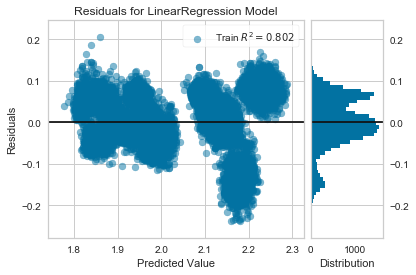

In [991]:
y = FEEDER['PRICEN'] 
X = FEEDER[['SYEAR','SAREA','BREED','WT','HEADN','FRAME','VAC','SEX']]
regre = lm.LinearRegression()
visualizer = ResidualsPlot(regre)

visualizer.fit(X, y)  # Fit the training data to the model
#visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()                 # Draw/show/poof the data


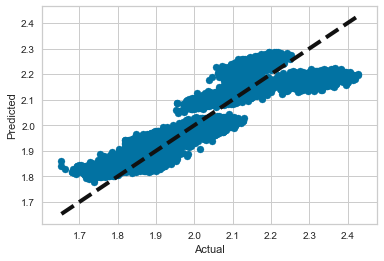

In [992]:
plt.subplots()
plt.scatter(y, model1_y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)   #dotted line represents perfect prediction (actual = predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## Model Evaluation and Refinement

In [993]:
runs_reg_model1 = ols("PRICE~Y_1996+Y_1997+Y_1998+Y_1999+Y_2000+Y_2001+Y_2002+Y_2003+Y_2004+Y_2005+Y_2010+Y_2011+Y_2012+Y_2013+Y_2014+Y_2015+Y_2016+Y_2017+Y_2018+HEAD+WT+SEX_1+SEX_2+SAREA_1+SAREA_2+SAREA_3+SAREA_5+BREED_1+BREED_3+BREED_4+FRAME_3+FRAME_4+FRAME_5+FLESH_2+FLESH_3+FLESH_4+FLESH_5+VAC_0+VAC_1", FEEDER)
runs_reg1 = runs_reg_model1.fit()

In [994]:
print runs_reg1.summary()

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 2.935e+04
Date:                Mon, 05 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:39:12   Log-Likelihood:                -77916.
No. Observations:               23862   AIC:                         1.559e+05
Df Residuals:                   23829   BIC:                         1.562e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.5508      0.147    315.613      0.0

In [995]:
runs_reg_model1 = ols("PRICE~Y_1996+Y_1997+Y_1998+Y_1999+Y_2000+Y_2001+Y_2002+Y_2003+Y_2004+Y_2005+Y_2010+Y_2011+Y_2012+Y_2013+Y_2014+Y_2015+Y_2016+Y_2017+Y_2018+HEADN+WT+SEX_1+SEX_2+SAREA_1+SAREA_2+SAREA_3+SAREA_5+BREED_1+BREED_3+BREED_4+FRAME_3+FRAME_4+FRAME_5+FLESH_2+FLESH_3+FLESH_4+FLESH_5+VAC_0+VAC_1", FEEDER)
runs_reg1 = runs_reg_model1.fit()

In [996]:
print runs_reg1.summary()

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 2.963e+04
Date:                Mon, 05 Aug 2019   Prob (F-statistic):               0.00
Time:                        17:39:12   Log-Likelihood:                -77807.
No. Observations:               23862   AIC:                         1.557e+05
Df Residuals:                   23829   BIC:                         1.559e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.8272      0.170    263.374      0.0

## Final Model

### In SAS 9.4
data FEEDER;
infile 'C:\Users\Esther\Documents\K-State Graduate School\Classes\PhD\GENBA 894\DATA\FEEDER.txt' firstobs=2 dlm='09'X;
input SYEAR LOTID SMONTH HEAD SEX WT PRICE STATE $ STATECODE SAREA BREED FRAME FLESH VAC;
run;

proc print data=FEEDER (obs=15);
run;


proc freq;
tables SYEAR SAREA BREED FRAME FLESH VAC;
QUIT;

proc MEANS N MEAN STD MEDIAM MIN MAX;
var HEAD WT PRICE;
quit;

proc mixed;
class SYEAR SEX SAREA BREED FRAME FLESH;
model price = SYEAR WT SEX SAREA BREED FRAME FLESH WT HEAD/solution ddfm=BETWITHIN;
RANDOM SMONTH(SYEAR)/SOLUTION;
lsmeans SYEAR SEX SAREA BREED FRAME FLESH/adjust=tukey;
quit;

run;

## Model Validation

In [997]:
# import dataset
FEEDER1=pd.read_csv("DATA/FEEDER1.csv")
FEEDER1.head()

,Unnamed: 0,SYEAR,LOTID,SMONTH,HEAD,SEX,WT,PRICE,STATE,STATECODE,SAREA,BREED,FRAME,FLESH,VAC
0,0,2010,111922,6,39,1,640,105.25,TX,26,3,4,4,4,0
1,1,2010,111923,6,39,2,640,98.25,TX,26,3,4,4,4,0
2,2,2010,111924,6,35,1,700,105.50,LA,45,5,4,3,2,0
3,3,2010,111925,6,35,2,700,99.50,LA,45,5,4,3,2,0
4,4,2010,111926,6,32,1,735,105.25,TX,26,3,4,4,4,1


In [998]:
#now we can drop the orgional columns we created the dummy variables for
FEEDER1 = FEEDER1.drop(['Unnamed: 0', 'LOTID', 'STATE', 'STATECODE', 'VAC'], axis=1)
FEEDER1.head()

,SYEAR,SMONTH,HEAD,SEX,WT,PRICE,SAREA,BREED,FRAME,FLESH
0,2010,6,39,1,640,105.25,3,4,4,4
1,2010,6,39,2,640,98.25,3,4,4,4
2,2010,6,35,1,700,105.50,5,4,3,2
3,2010,6,35,2,700,99.50,5,4,3,2
4,2010,6,32,1,735,105.25,3,4,4,4


In [999]:
FEEDER1 = FEEDER1.astype({"PRICE": int, "WT": int, "HEAD":int})

In [1000]:
y = FEEDER1['PRICE'] 
X = FEEDER1[['SYEAR','SAREA','BREED','WT','HEAD','FRAME','SEX']]

In [1001]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(FEEDER1, y, test_size=0.3)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(16703, 10) (16703L,)
(7159, 10) (7159L,)


In [1002]:
# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

In [1003]:
predictions[0:5]

array([139.,  74., 131., 110.,  62.])

Text(0,0.5,'Predictions')

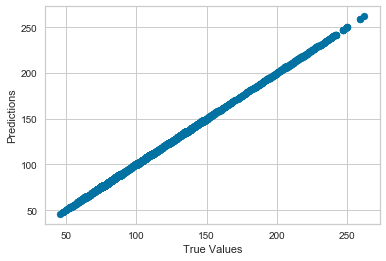

In [1004]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [1005]:
print 'Score:', model.score(X_test, y_test)

Score: 1.0


In [1006]:
# evaluate the decision tree model using 10-fold cross-validation
scores = cross_val_score(dt, X, y, scoring='accuracy', cv=10)
print scores
print scores.mean()

[0.07157218 0.07832792 0.07216072 0.07281754 0.06892231 0.08185654
 0.0625     0.07596567 0.06358131 0.05790161]
0.07056057981651372


In [1007]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize DecisionTreeClassifier()
dt = DecisionTreeClassifier()

# Train a decision tree model
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [1008]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print metrics.accuracy_score(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
print metrics.confusion_matrix(y_test, dt.predict(X_test)) 
print "--------------------------------------------------------"
print metrics.classification_report(y_test, dt.predict(X_test))
print "--------------------------------------------------------"
#print metrics.roc_auc_score(y_test, dt.predict(X_test))

# y-test is the acual y value in the testing dataset
# dt.predict(X_test) is the predicted y value generated by your model
# If they are same, we can say your model is accurate.

0.1169076052796983
--------------------------------------------------------
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
--------------------------------------------------------
             precision    recall  f1-score   support

         48       0.00      0.00      0.00         1
         49       0.00      0.00      0.00         2
         50       0.00      0.00      0.00         2
         51       0.00      0.00      0.00         0
         52       0.00      0.00      0.00         4
         53       0.00      0.00      0.00         6
         54       0.08      0.25      0.12         4
         55       0.25      0.40      0.31         5
         56       0.25      0.17      0.20         6
         57       0.23      0.16      0.19        19
         58       0.17      0.18      0.17        17
         59       0.23      0.21      0.22        28
         60       0.19      0.15      0.17        33
    

C:\Users\Esther\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Esther\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
